In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skit
import seaborn as sns
from IPython.display import display, Markdown, Latex

In [3]:
def do_plot(sizeX, sizeY, index, data, xLabel, yLabel, legend, file, yTicks = 30, dataDiv = 1, log = False):
    data = data / dataDiv
    fig, ax = plt.subplots(figsize=(sizeX,sizeY))
    if log:
        ax.set_yscale('log', basey=2)
    if index is None:
        ax.plot(data ,  marker='.',linewidth=0.0,  markersize=36)
    else:
        ax.plot(index, data ,  marker='.',linewidth=0.0,  markersize=36)
        ax.set_xticks(index)
    yTick = []
    last = None
    tick = data.values.reshape((data.values.size))
    tick.sort()
    minSize = tick[-1] / yTicks
    for i in tick:
        if last is None:
            yTick.append(i)
            last = i
            continue
        if i - last > minSize:
            yTick.append(i)
            last = i
    ax.set_yticks(yTick)
    
    ax.legend(legend, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 40, ncol=2,
              loc='lower left',mode="expand", borderaxespad=0.)
    plt.xticks(fontsize=45, rotation=70)
    plt.yticks(fontsize=45)
    plt.xlabel(xLabel, size = 50)
    plt.ylabel(yLabel, size = 50)
    plt.grid()
    fig.savefig(file, bbox_inches='tight')

In [4]:
def load_data(files, divider):
    loaded = {}
    for file in files:
        loaded[float(file.split('.')[0])/divider] = pd.read_csv(file).reset_index(drop=True)
    return loaded


def add_row(dataframe, data, columns, index, mean = True):
    if mean: 
        dataframe.loc[index] = [data.mean()[i] for i in columns]
    else: 
        dataframe.loc[index] = [data.max()[i] for i in columns]
        
def crate_data_frame(files, columns, divider = 1, mean = True):
    df = pd.DataFrame(columns=columns)
    loaded = load_data(files, divider)
    for i in loaded:
        add_row(df, loaded[i], columns, i, mean)
    return df
        
    

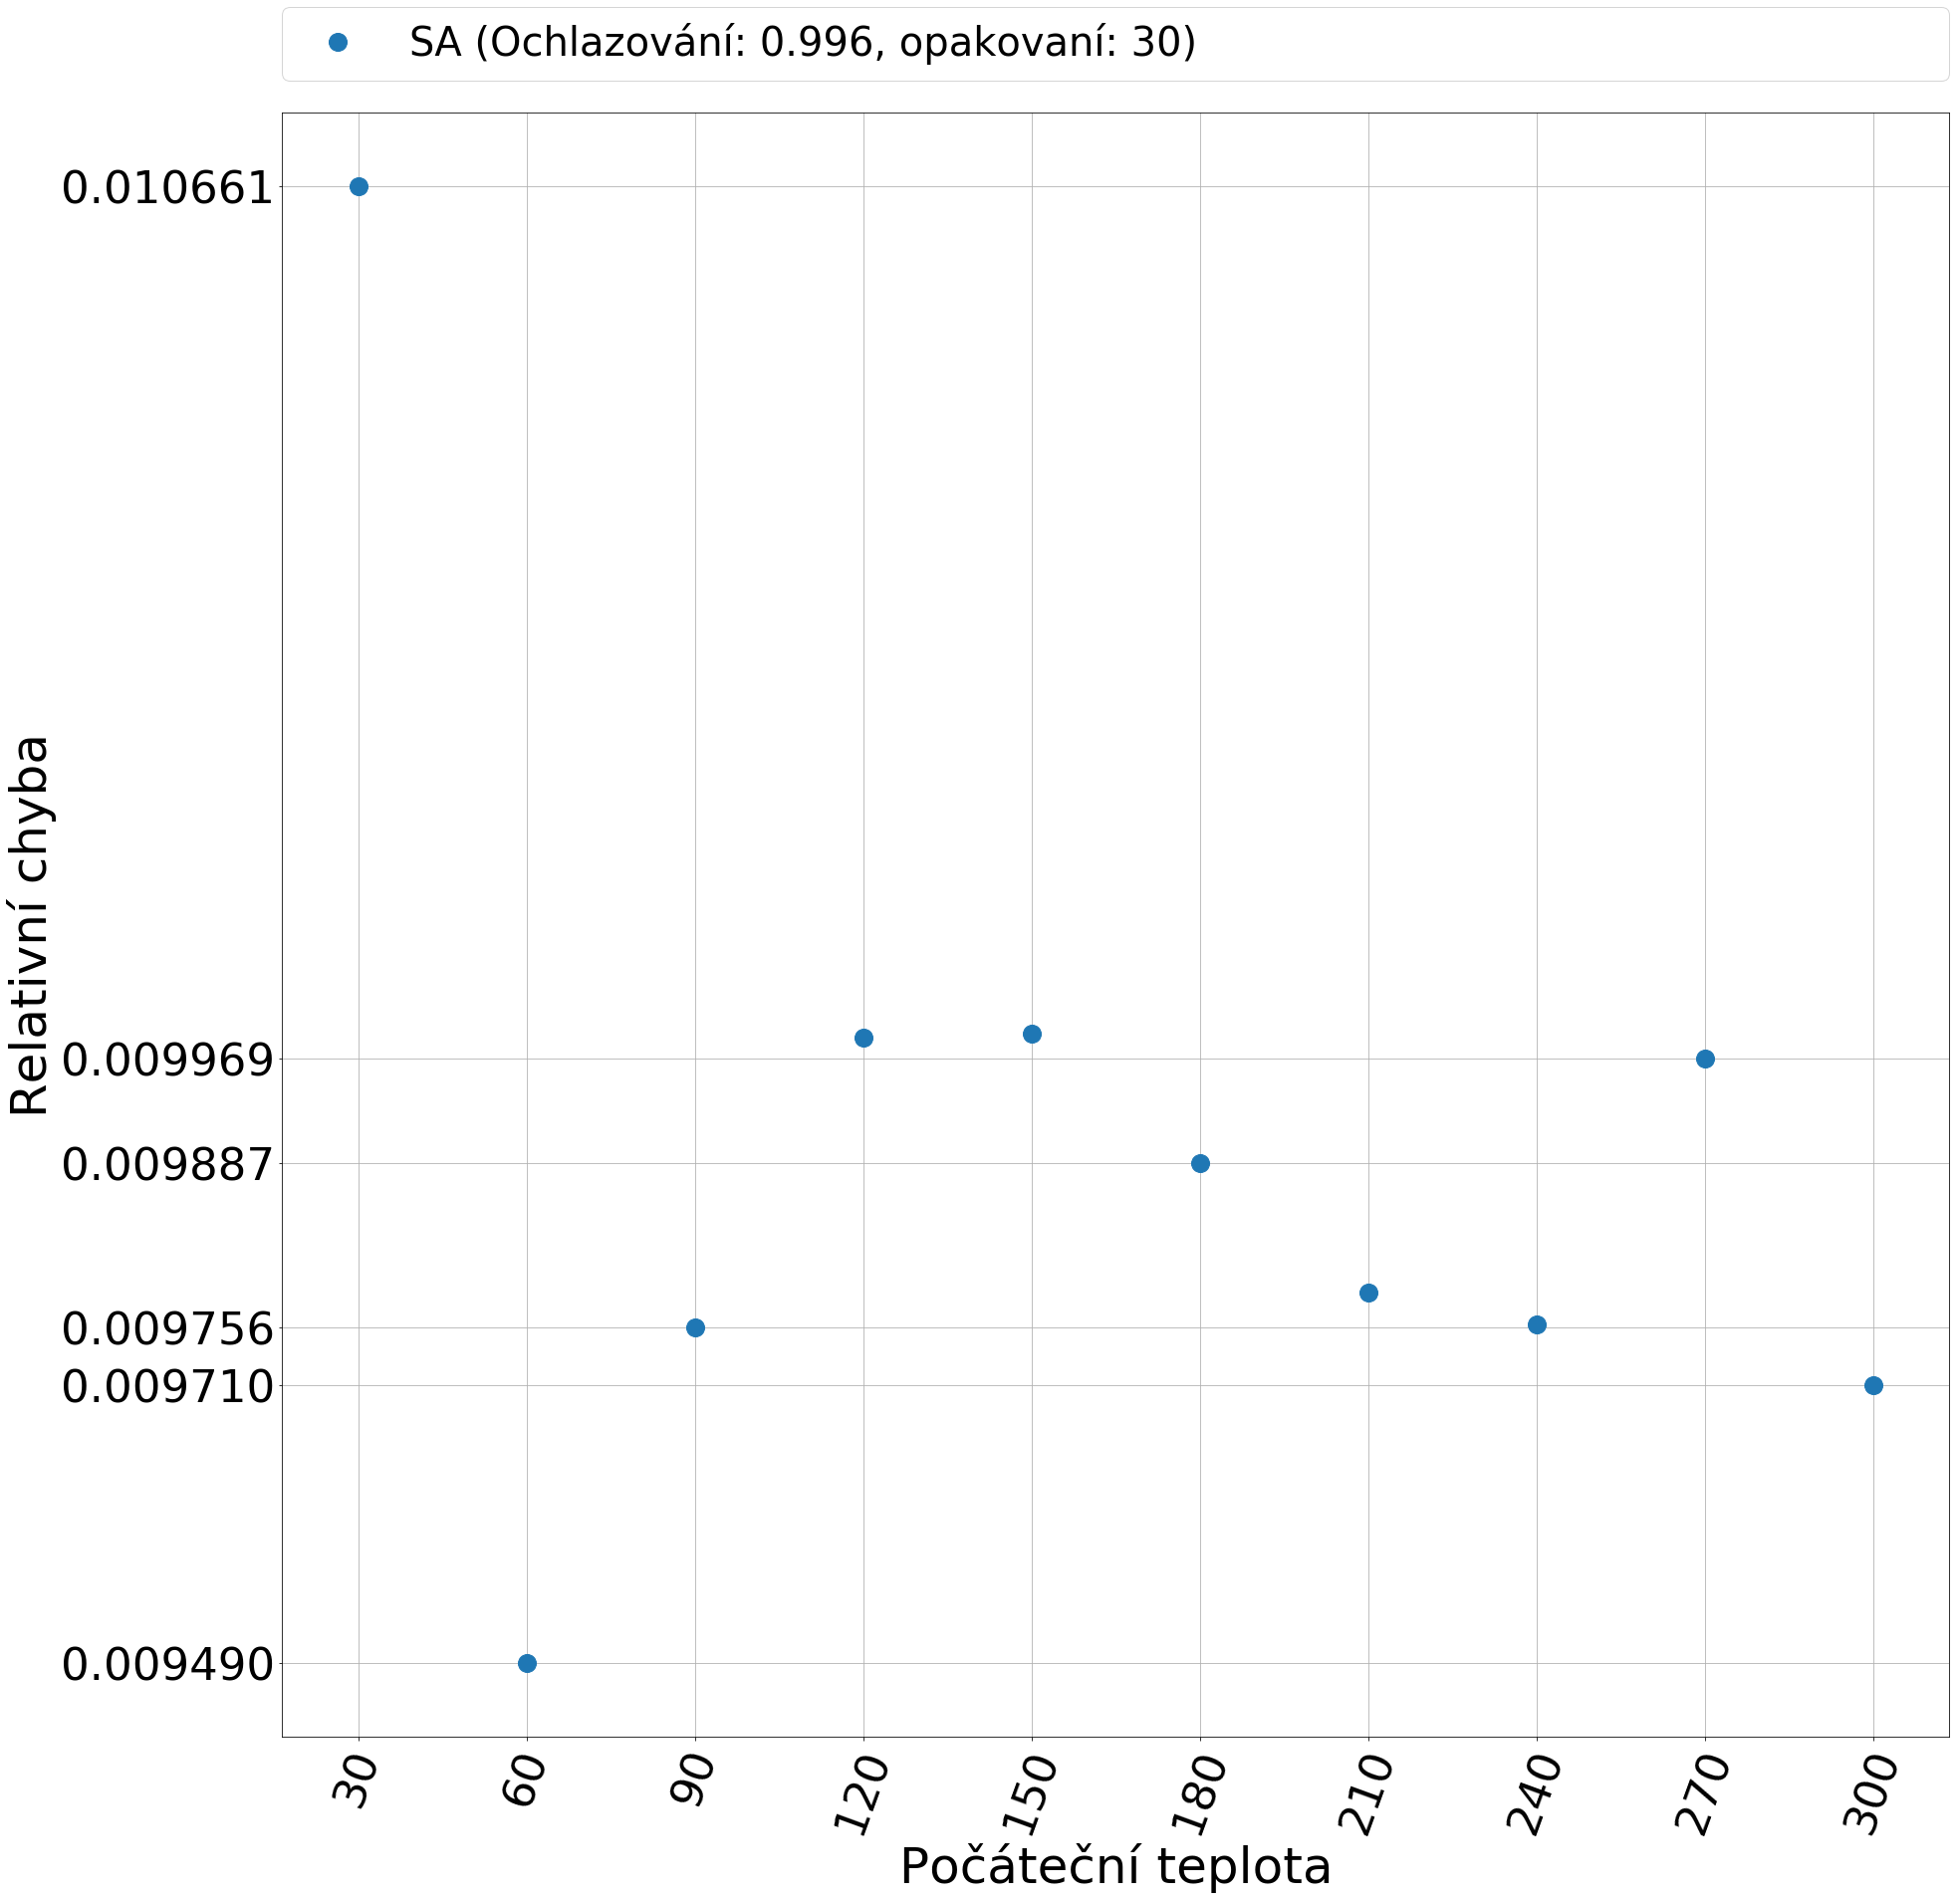

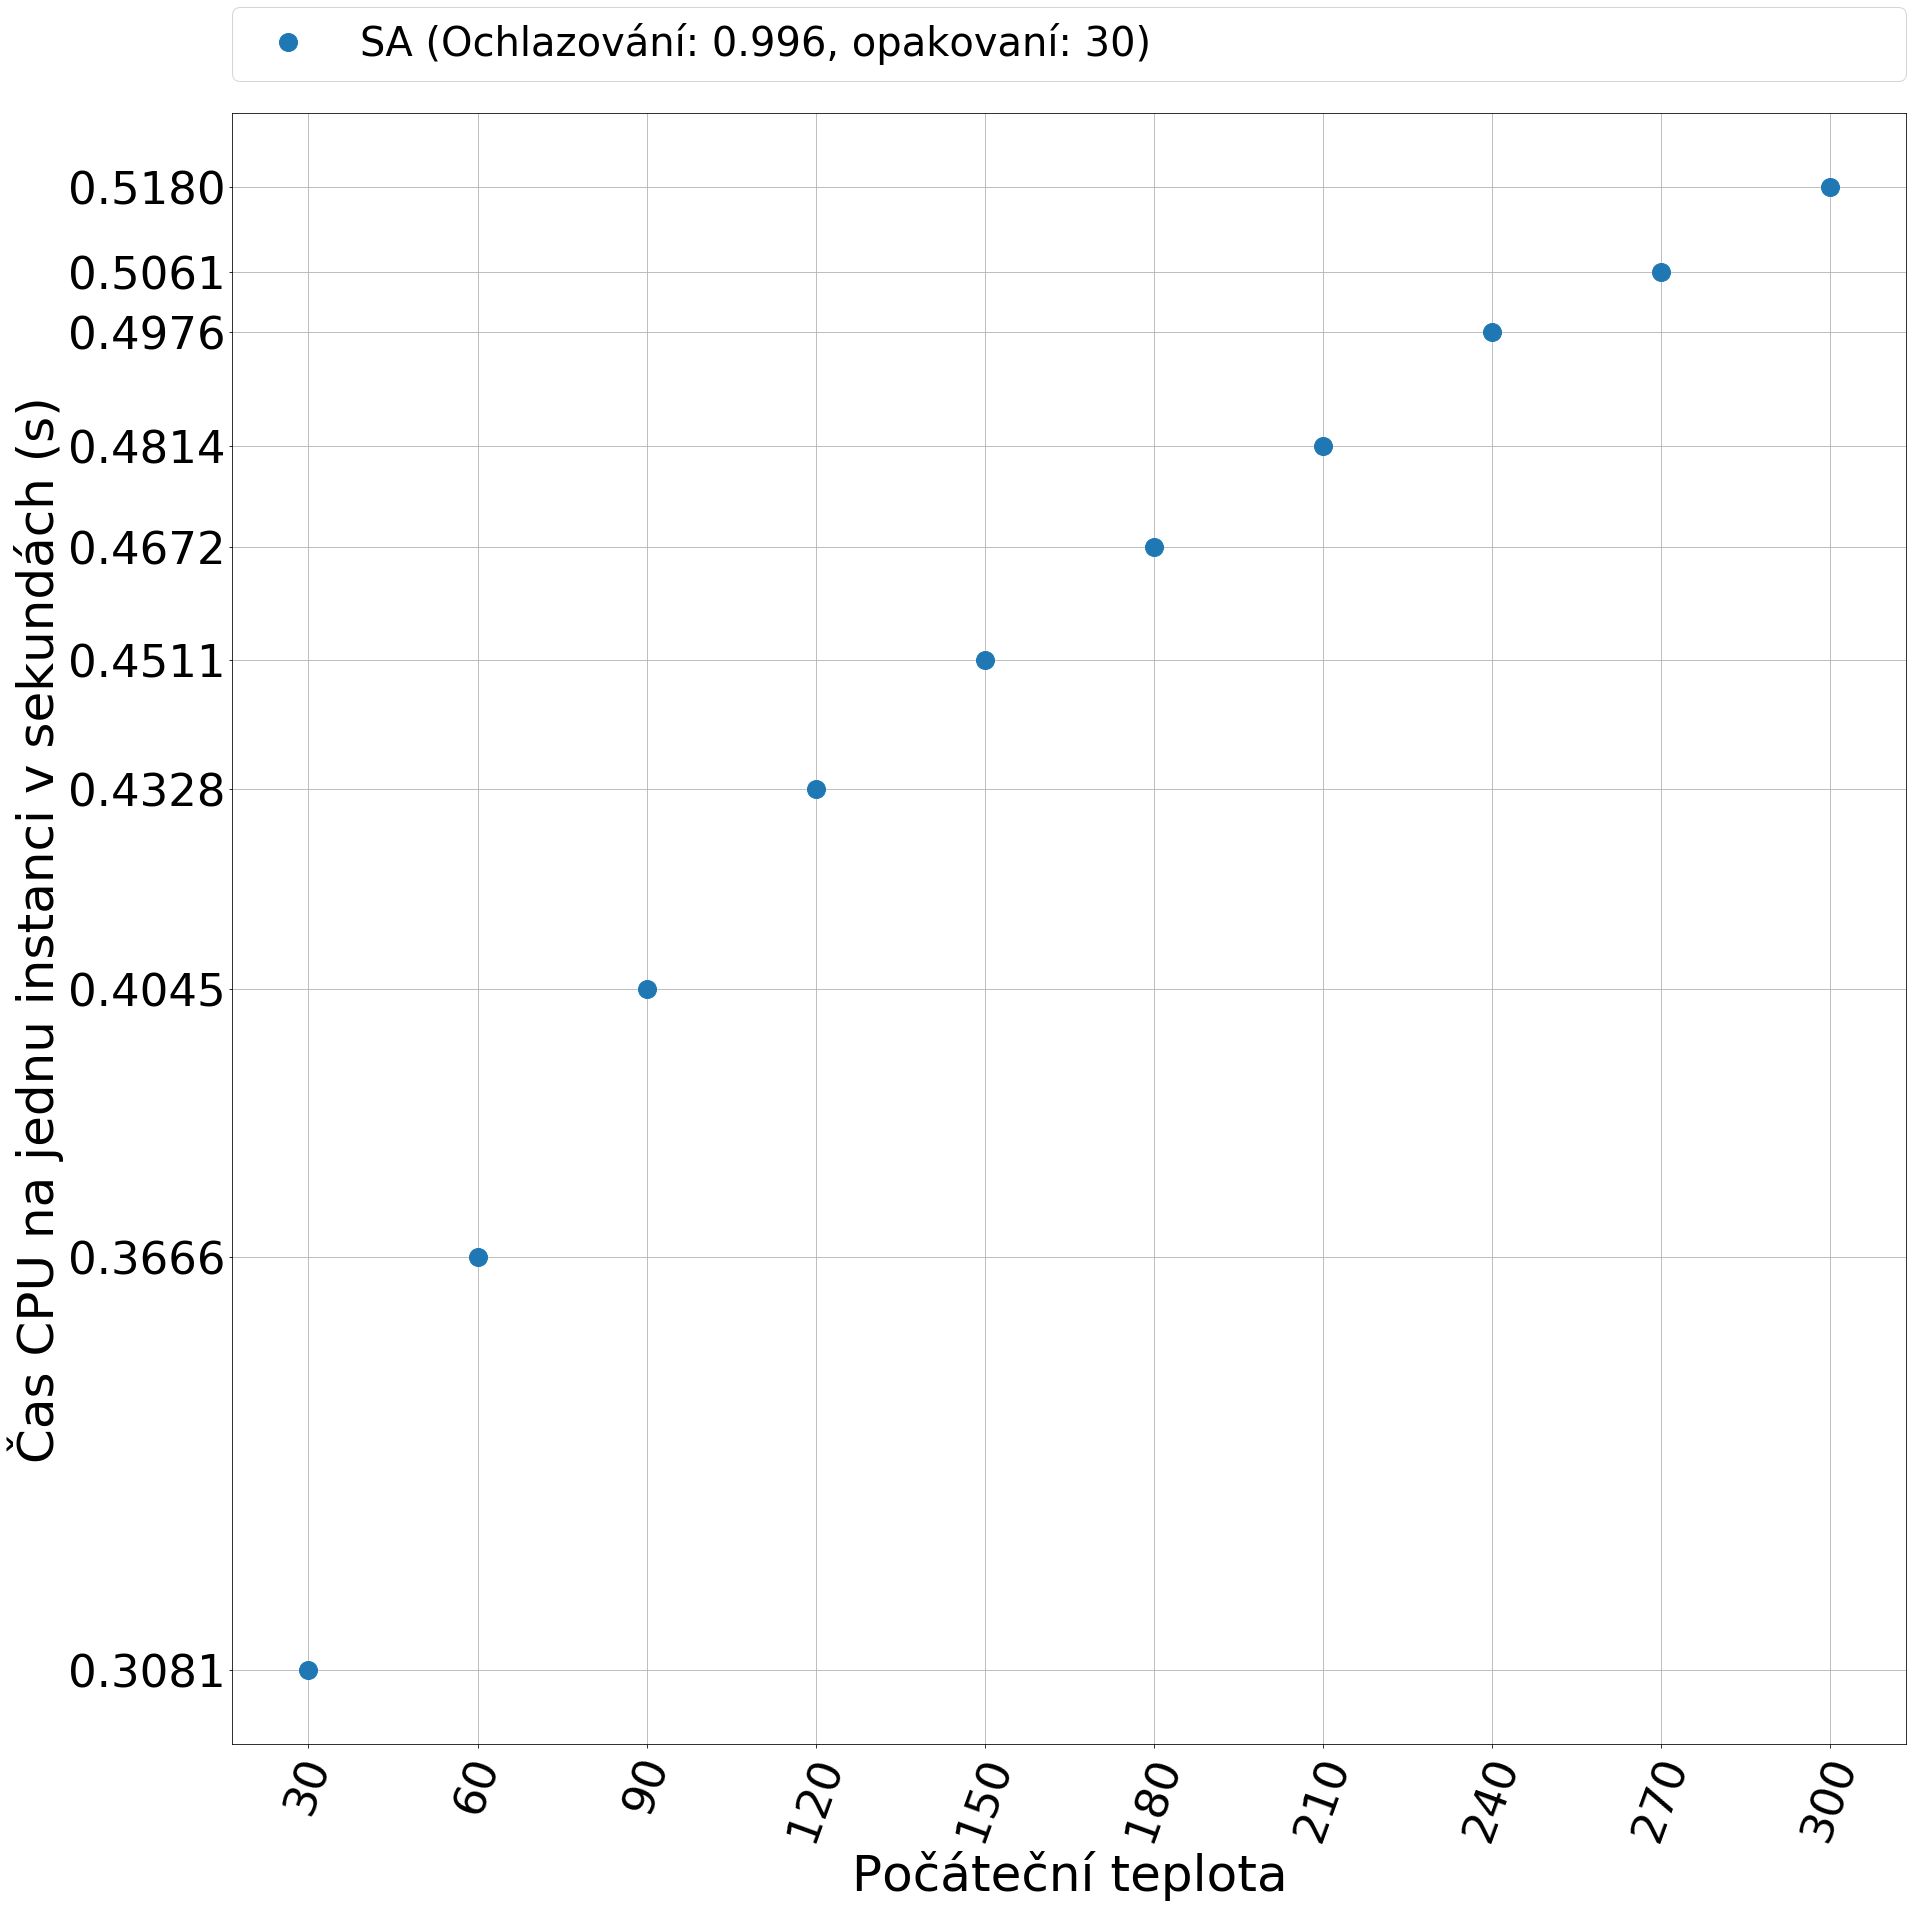

In [15]:
data = pd.read_csv('test.csv').reset_index(drop=True)
df = data.loc[(data['cool_rate'] >= 0.996) & (data['cycle'] == 30)]

df = df.groupby(['temp'], as_index=False).mean()

do_plot(30, 30, df.temp, df[['err']], 
        "Počáteční teplota", "Relativní chyba", ['SA (Ochlazování: 0.996, opakovaní: 30)'], 
        "TE.pdf", 300, 1)
do_plot(30, 30, df.temp, df[['time']], 
        "Počáteční teplota", "Čas CPU na jednu instanci v sekundách (s)", ['SA (Ochlazování: 0.996, opakovaní: 30)'], 
        "TT.pdf", 400, 1)

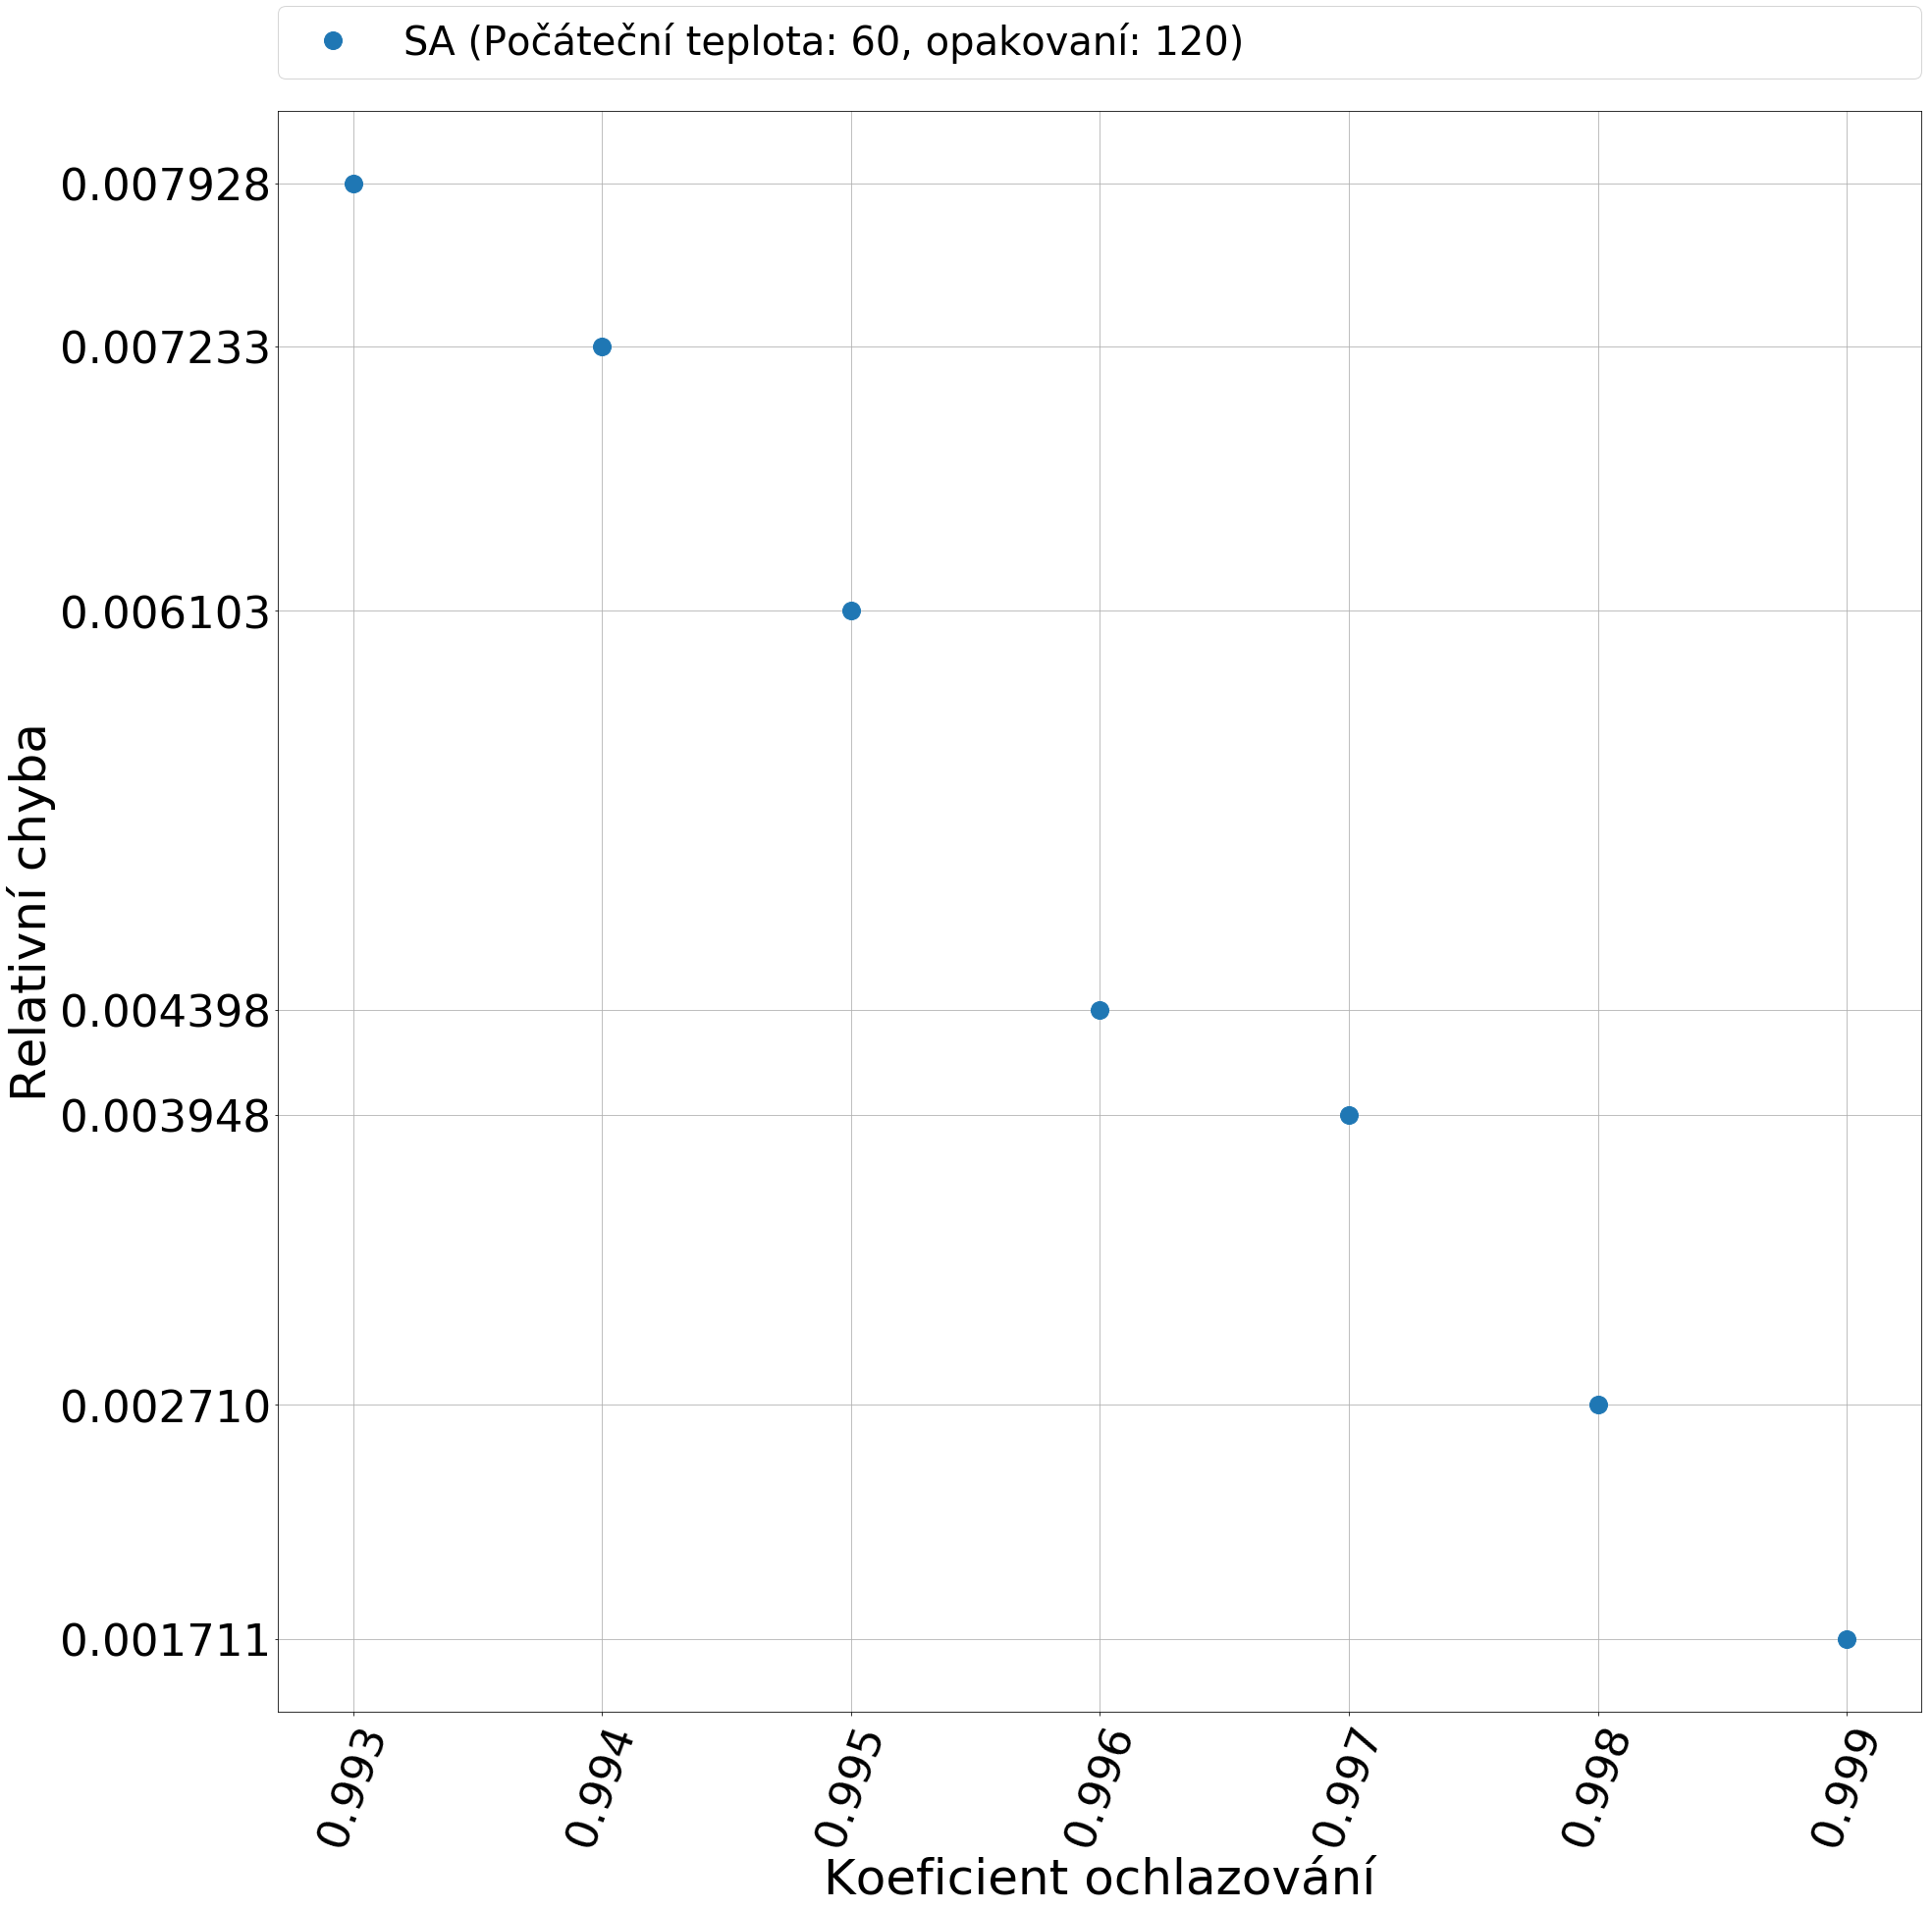

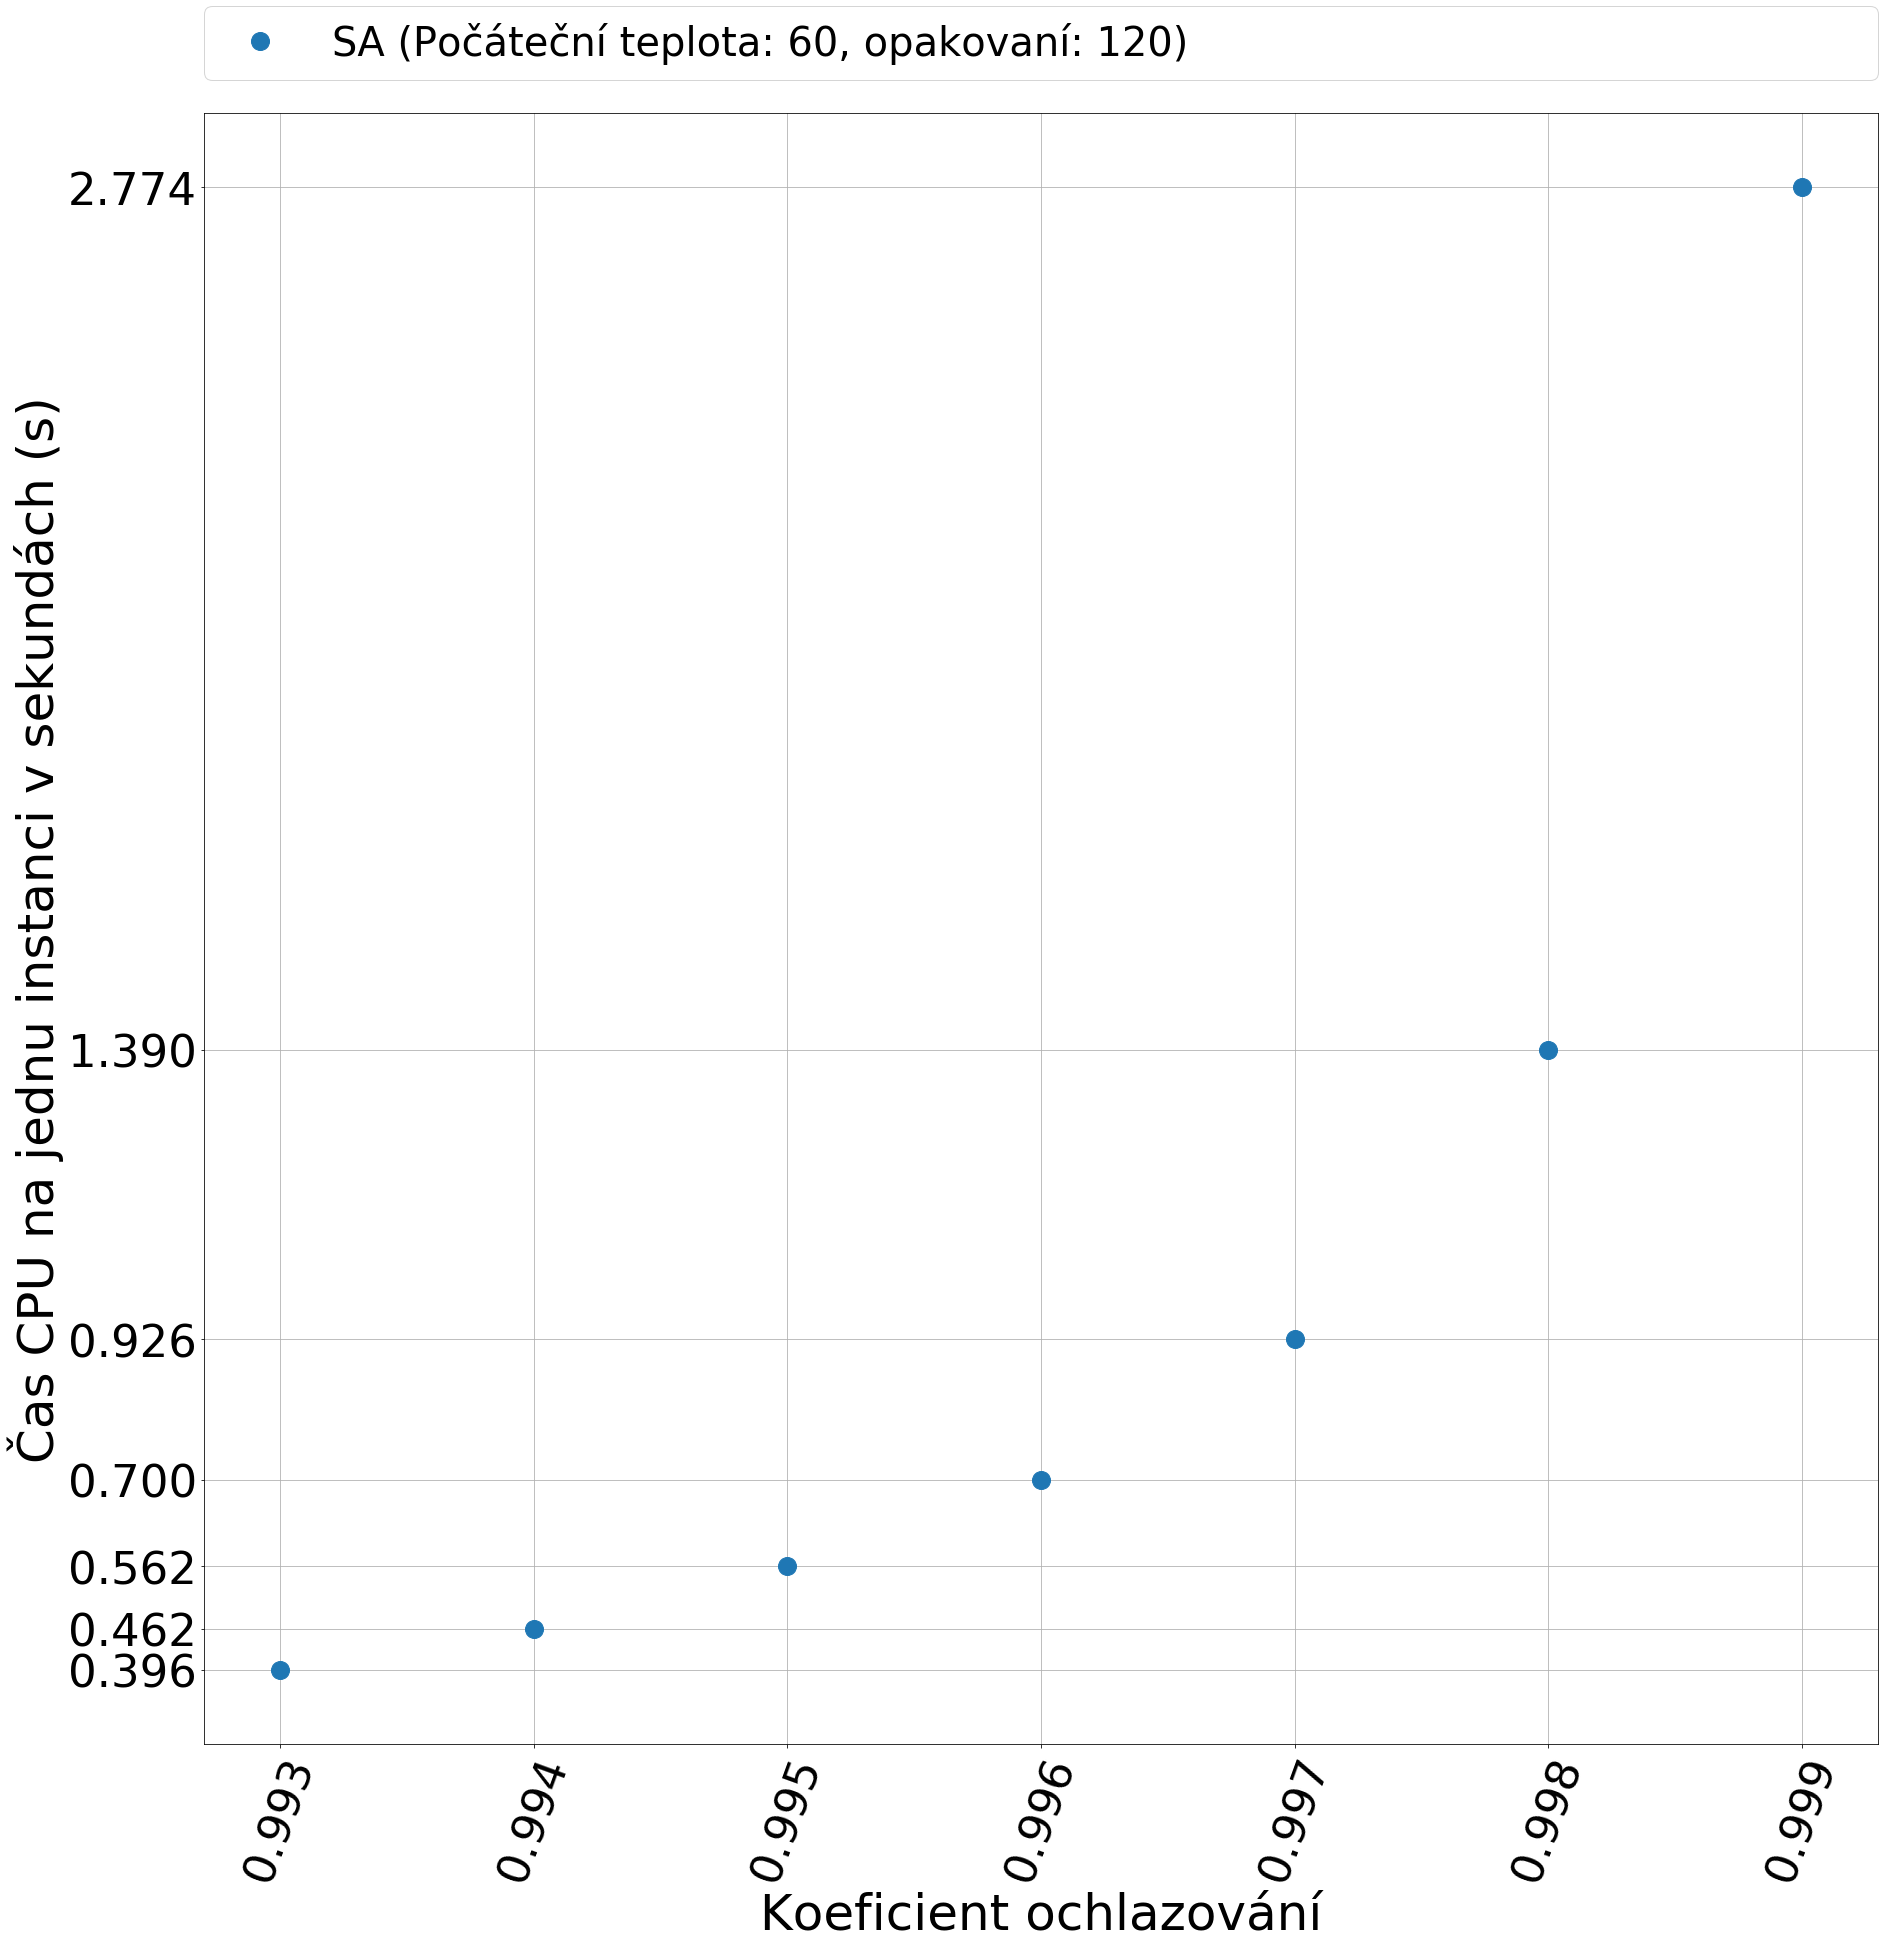

In [13]:
df = data.loc[(data['temp'] == 60) & (data['cycle'] == 120.)]


df = df.groupby(['cool_rate'], as_index=False).mean()
do_plot(30, 30, df.cool_rate, df[['err']], 
        "Koeficient ochlazování", "Relativní chyba", ['SA (Počáteční teplota: 60, opakovaní: 120)'], 
        "KE.pdf", 300, 1)
do_plot(30, 30, df.cool_rate, df[['time']], 
        "Koeficient ochlazování", "Čas CPU na jednu instanci v sekundách (s)", ['SA (Počáteční teplota: 60, opakovaní: 120)'], 
        "KT.pdf", 400, 1)

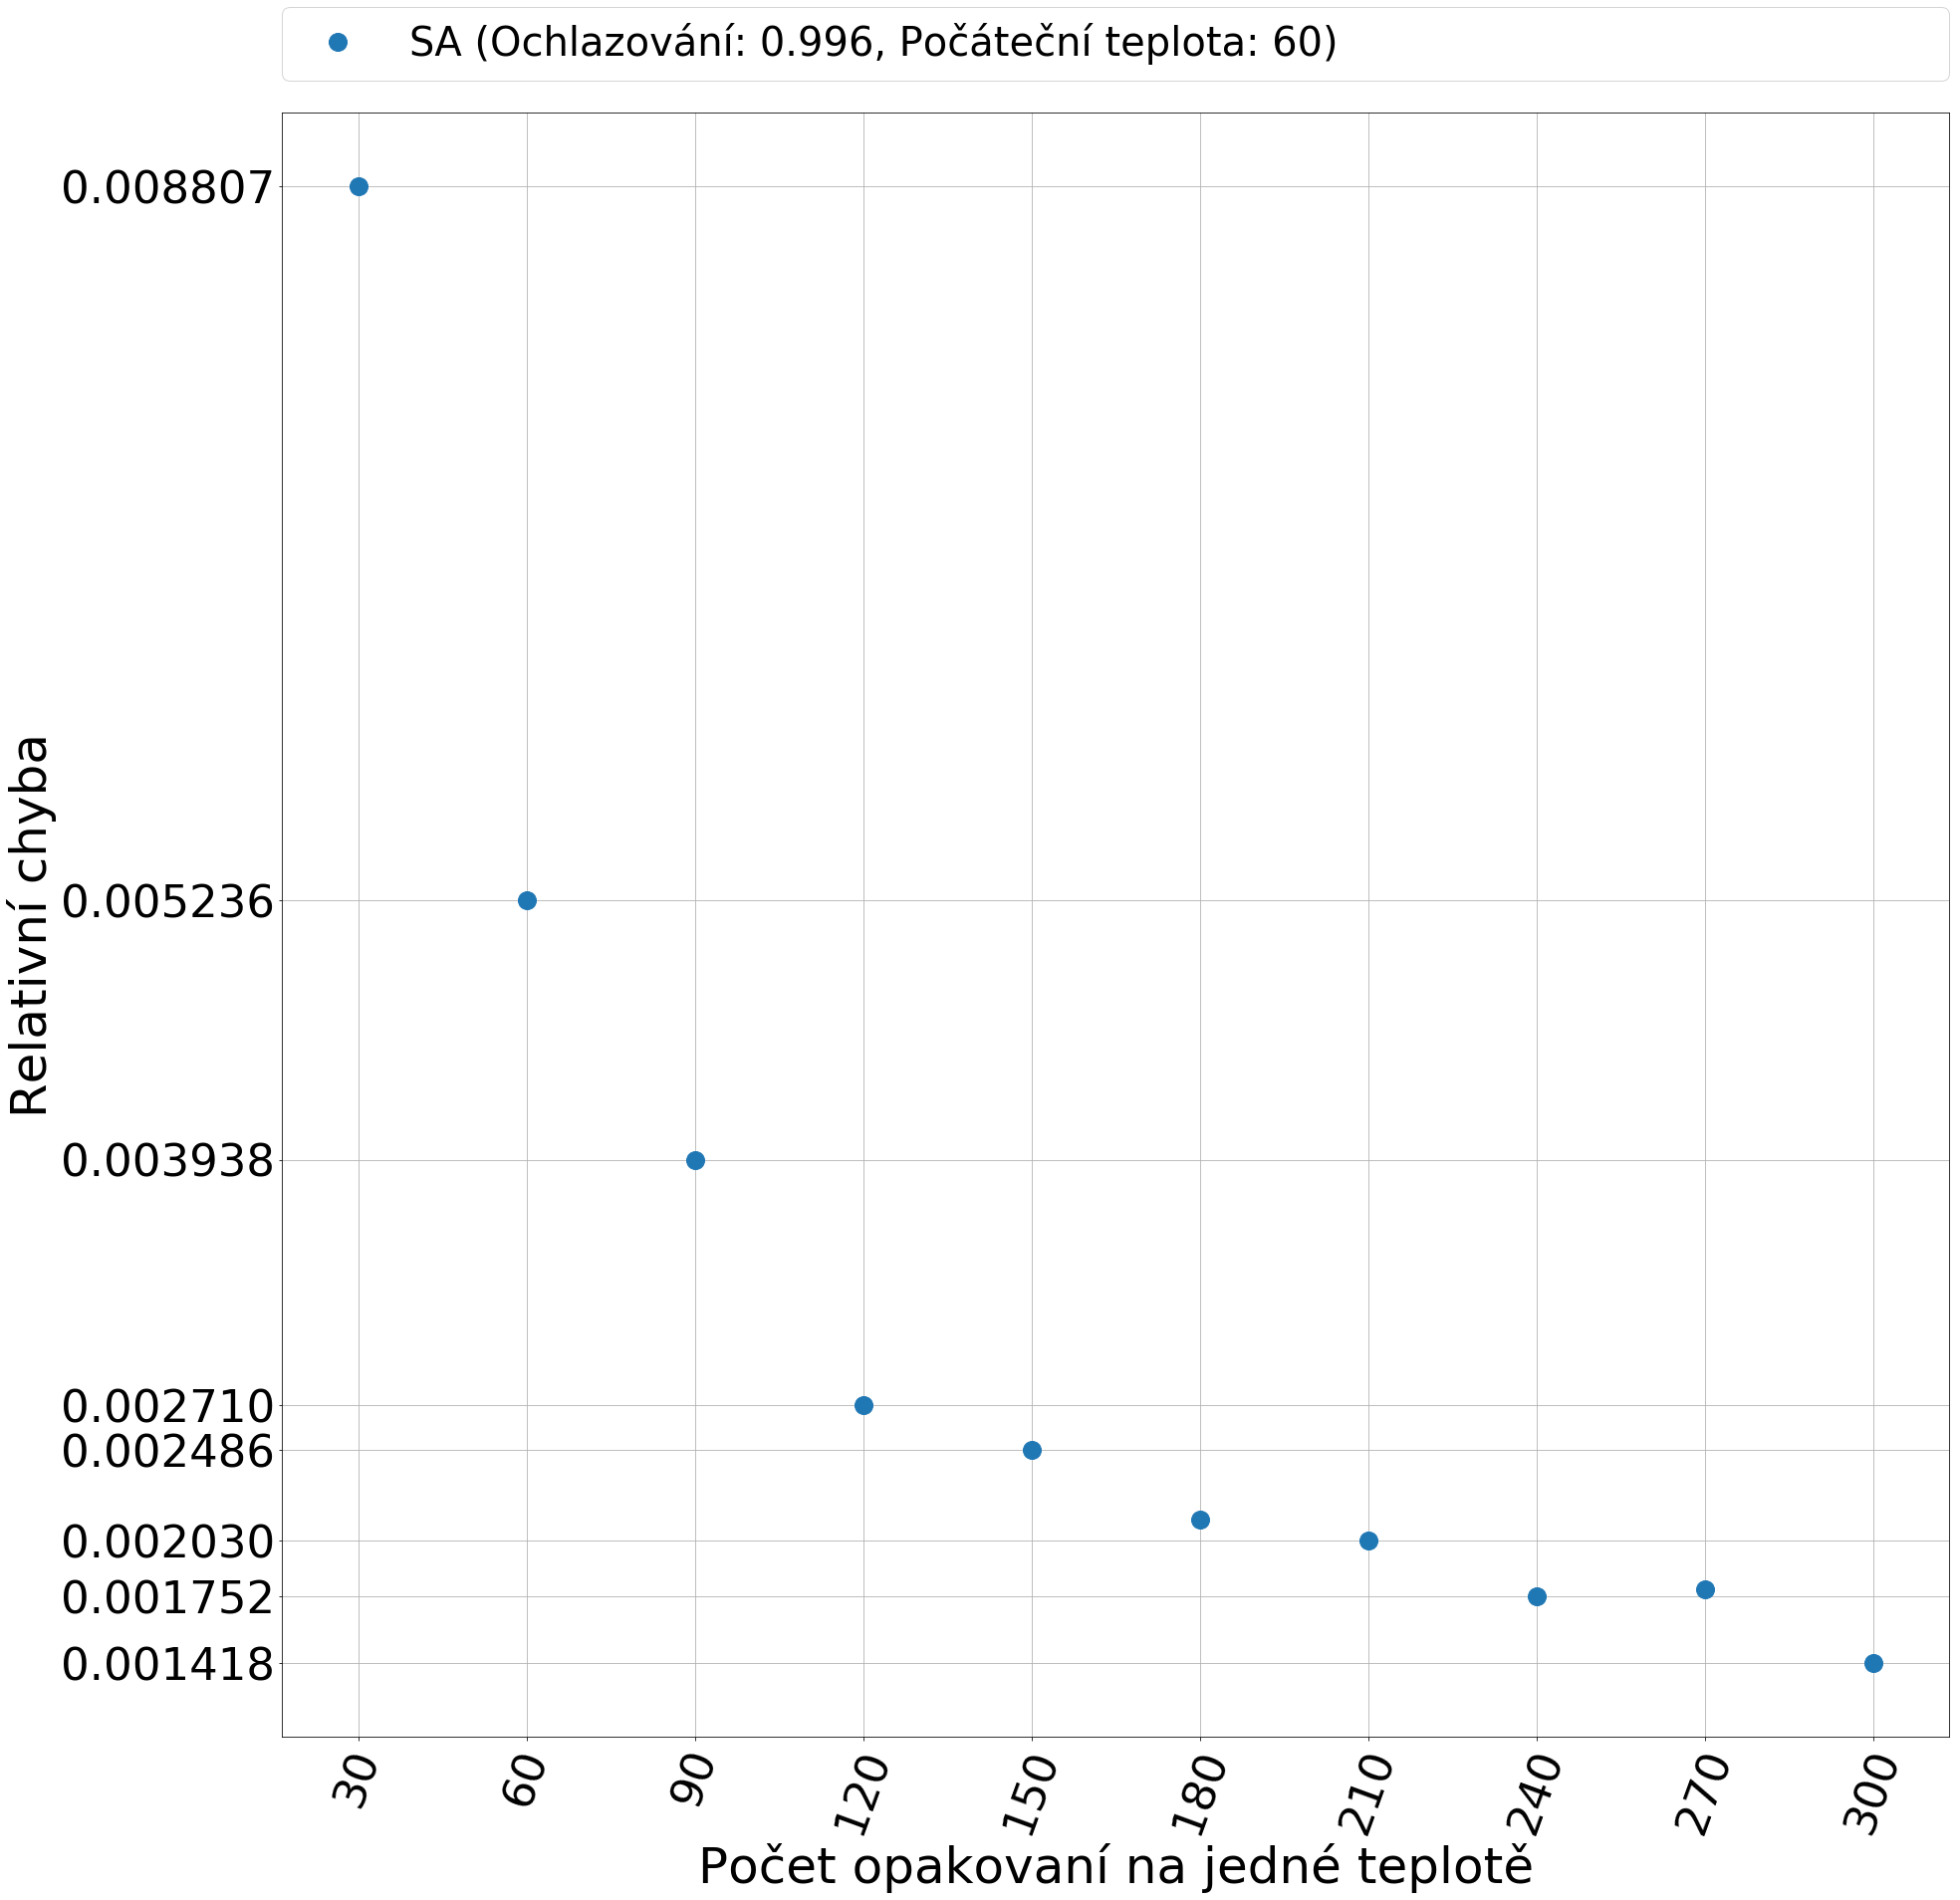

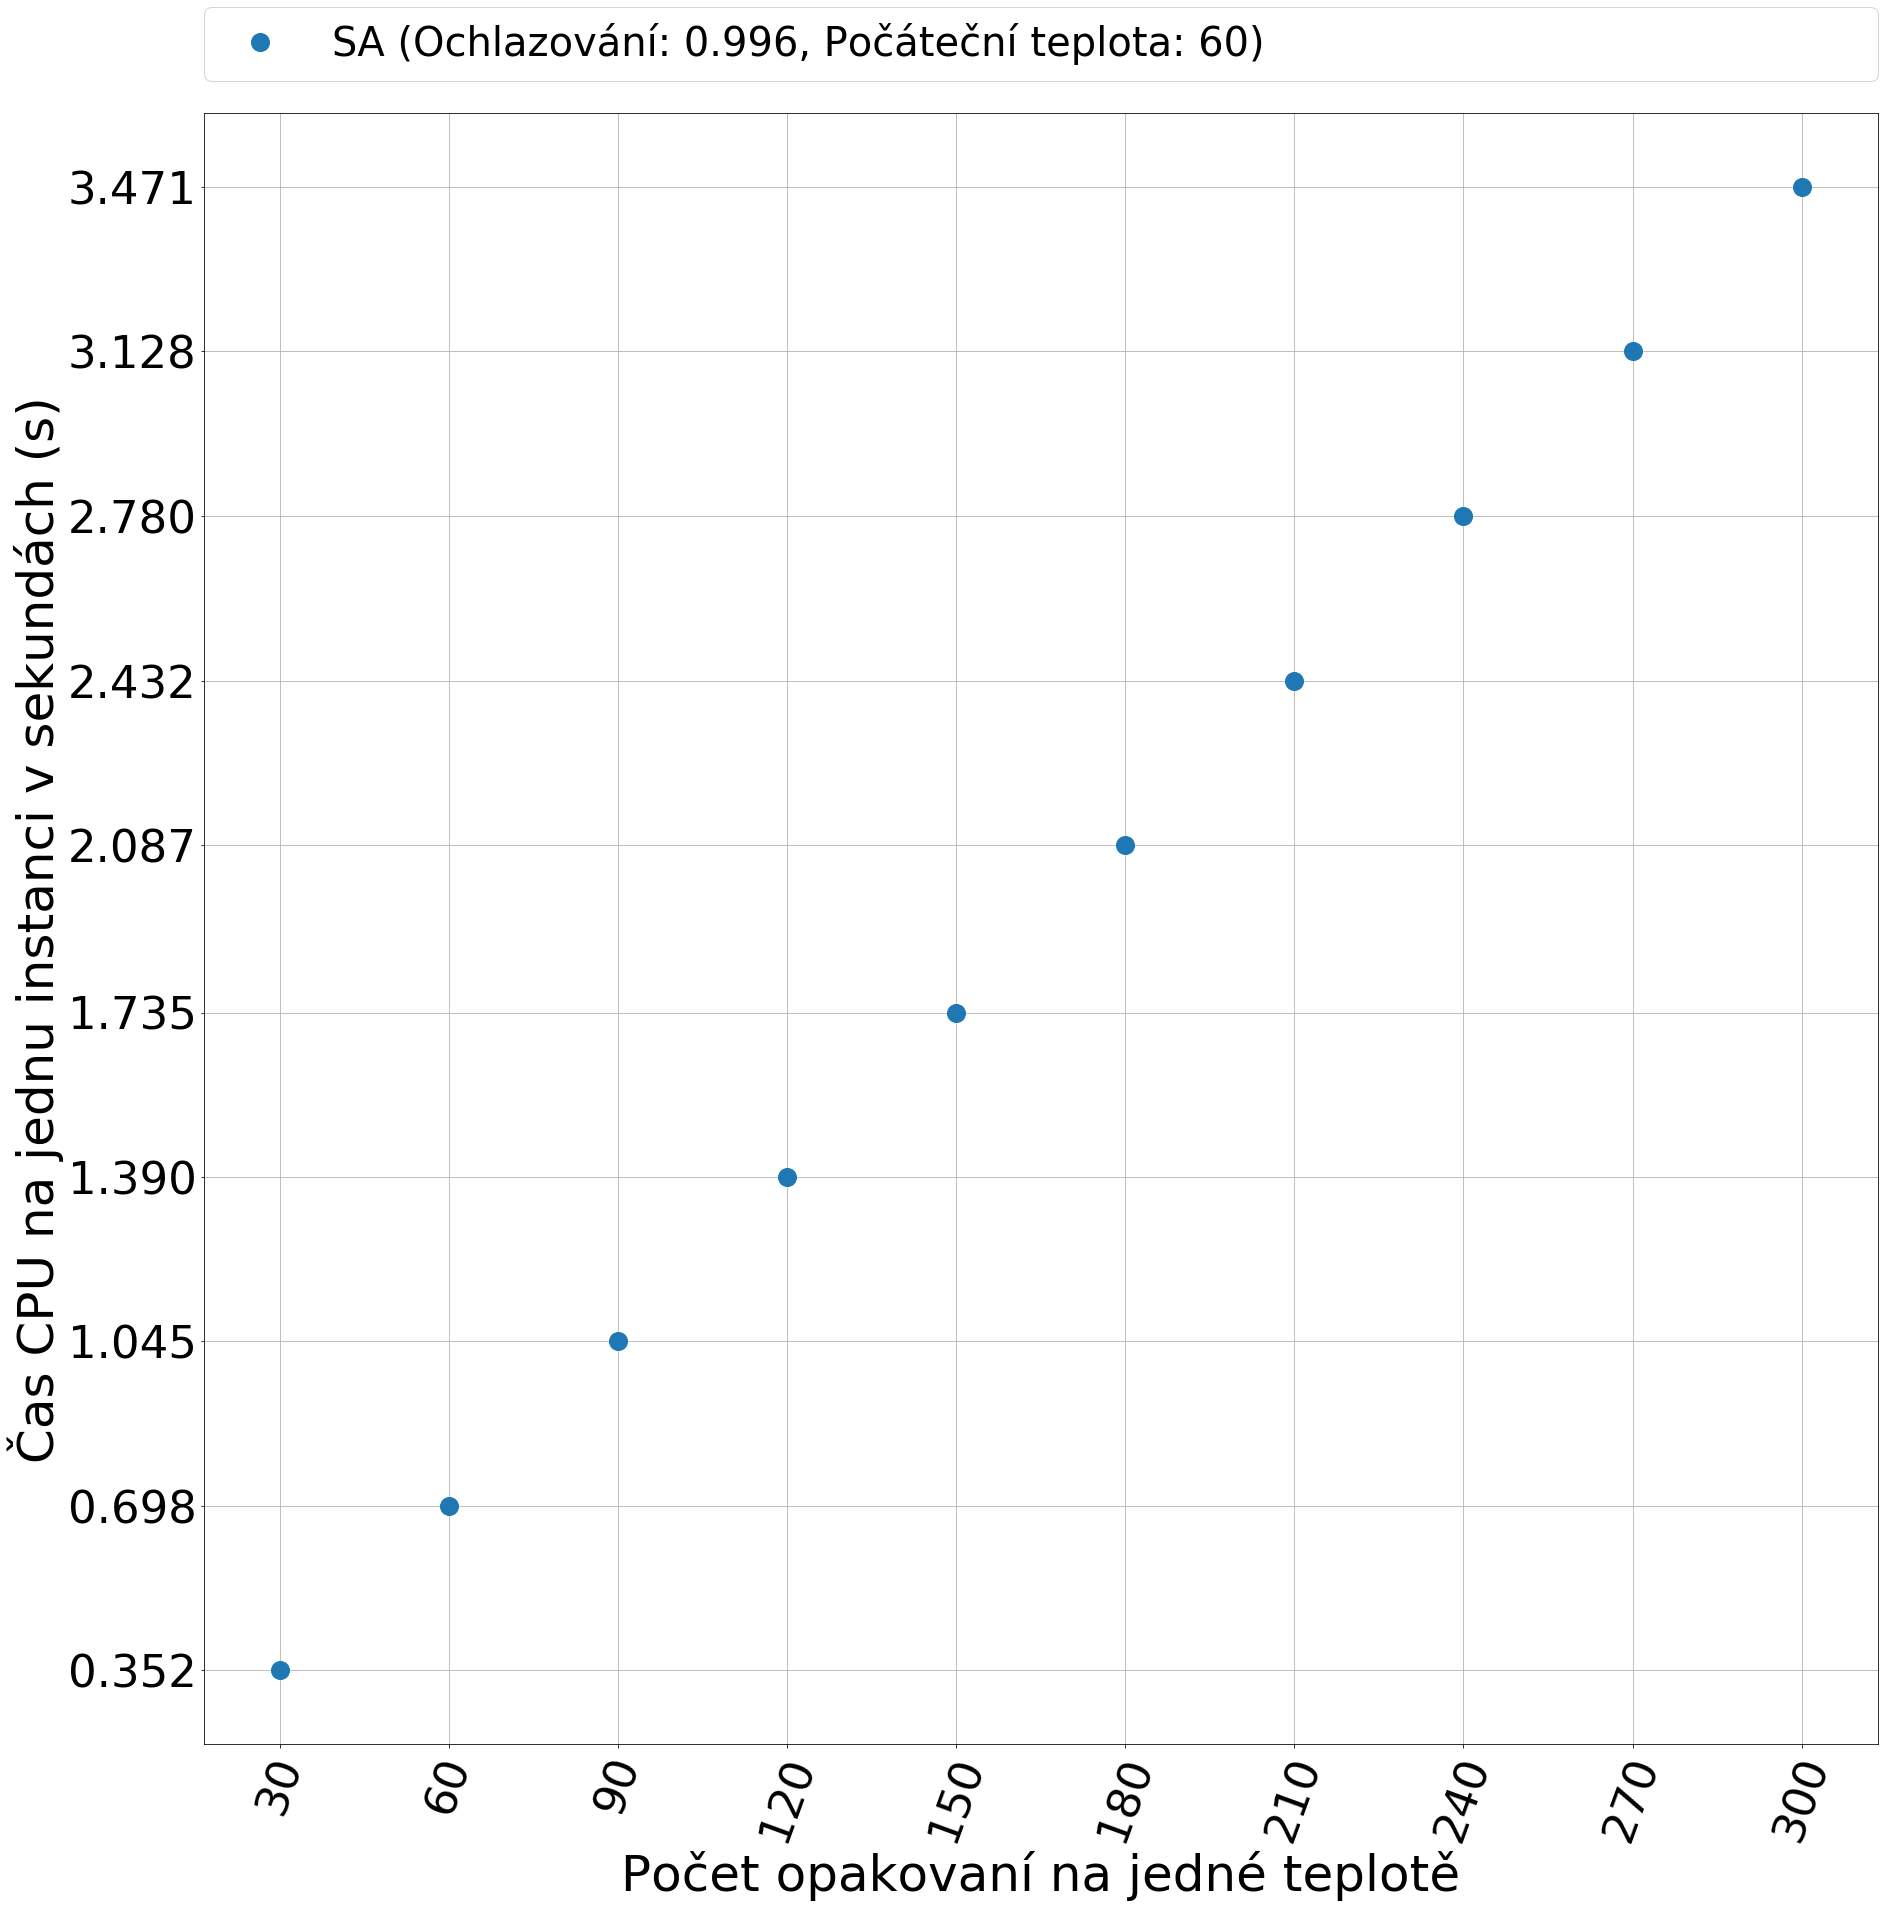

In [11]:
df = data.loc[(data['temp'] == 60) & (data['cool_rate'] == 0.998)]


df = df.groupby(['cycle'], as_index=False).mean()
do_plot(30, 30, df.cycle, df[['err']], 
        "Počet opakovaní na jedné teplotě", "Relativní chyba", ['SA (Ochlazování: 0.996, Počáteční teplota: 60)'], 
        "CE.pdf", 80, 1)
do_plot(30, 30, df.cycle, df[['time']], 
        "Počet opakovaní na jedné teplotě", "Čas CPU na jednu instanci v sekundách (s)", ['SA (Ochlazování: 0.996, Počáteční teplota: 60)'], 
        "CT.pdf", 400, 1)